In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
true_w, true_b = 7.0, 4.0

def create_batch(batch_size=64):
    x = np.random.randn(batch_size, 1)
    y = np.random.randn(batch_size, 1) + true_w * x + true_b
    
    return x, y

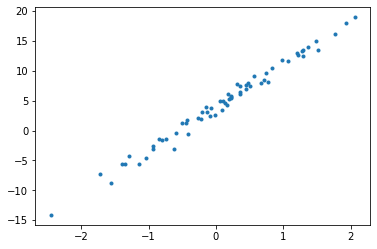

In [3]:
x, y = create_batch()

plt.plot(x, y, '.');

In [4]:
iterations = 100
lr = 0.03

w = tf.Variable(10.0)
b = tf.Variable(1.0)

param_history = {'w': [], 'b': []}

for i in range(0, iterations):
    x_batch, y_batch = create_batch()
    x_batch = tf.constant(x_batch, dtype=tf.float32)
    y_batch = tf.constant(y_batch, dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        y = b + w * x_batch
        loss = tf.reduce_mean(tf.square(y - y_batch))
    dw = tape.gradient(loss, w)
    db = tape.gradient(loss, b)
    
    del tape
    
    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)
    
    param_history['w'].append(w.numpy())
    param_history['b'].append(b.numpy())
    
    if i%10==0:
        print('At iter {}, w={}, b={}'.format(i, w.numpy(), b.numpy()))

At iter 0, w=9.805174827575684, b=1.2265901565551758
At iter 10, w=8.473222732543945, b=2.5166432857513428
At iter 20, w=7.838310241699219, b=3.182734727859497
At iter 30, w=7.479685306549072, b=3.558891773223877
At iter 40, w=7.261641025543213, b=3.7892439365386963
At iter 50, w=7.132769584655762, b=3.9033560752868652
At iter 60, w=7.045076847076416, b=3.9473743438720703
At iter 70, w=7.035088062286377, b=4.0000786781311035
At iter 80, w=7.0251994132995605, b=3.997976064682007
At iter 90, w=6.992857933044434, b=3.9948551654815674


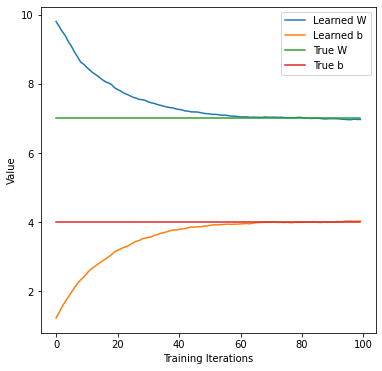

In [5]:
plt.figure(figsize=(6, 6))
plt.plot(range(iterations), param_history['w'], label='Learned W')
plt.plot(range(iterations), param_history['b'], label='Learned b')
plt.plot(range(iterations), [true_w]*iterations, label='True W')
plt.plot(range(iterations), [true_b]*iterations, label='True b')
plt.xlabel('Training Iterations')
plt.ylabel('Value')
plt.legend()
plt.show()